In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.utils.extmath import softmax

In [2]:
%matplotlib inline

In [3]:
plt.rcParams["font.size"] = 16

In [4]:
data = datasets.load_wine()
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df = df[['alcohol','malic_acid']]
df["class"] = data["target_names"][data["target"]]

In [5]:
xcols = ['alcohol','malic_acid']
train, test = train_test_split(df, random_state=5)
train

,alcohol,malic_acid,class
63,12.37,1.13,class_1
50,13.05,1.73,class_0
163,12.96,3.45,class_2
12,13.75,1.73,class_0
97,12.29,1.41,class_1
...,...,...,...
8,14.83,1.64,class_0
73,12.99,1.67,class_1
144,12.25,3.88,class_2
118,12.77,3.43,class_1


In [6]:
train["class"].value_counts()

class_1    57
class_0    40
class_2    36
Name: class, dtype: int64

In [7]:
# BUG 1: how to get rid of the "A value is trying to be set on a copy of a slice from a DataFrame" warning?
# Note that train is a slice of df (try to detach it with a copy)
multi = LogisticRegression(max_iter=10000)
multi.fit(train[xcols], train["class"])
test["prediction"] = multi.predict(test[xcols])
test.head(10)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,alcohol,malic_acid,class,prediction
28,13.87,1.90,class_0,class_0
66,13.11,1.01,class_1,class_0
3,14.37,1.95,class_0,class_0
17,13.83,1.57,class_0,class_0
138,13.49,3.59,class_2,class_2
166,13.45,3.70,class_2,class_2
48,14.10,2.02,class_0,class_0
40,13.56,1.71,class_0,class_0
95,12.47,1.52,class_1,class_1
25,13.05,2.05,class_0,class_1


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("poly", PolynomialFeatures()),
    ("lr", LogisticRegression(max_iter=10000))
])
pipe.fit(train[xcols], train["class"])

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [9]:
alch, acid = np.meshgrid(np.arange(11, 15, 0.01), np.arange(0, 6, 0.01))
cdf = pd.DataFrame({'alcohol': alch.reshape(-1),
                    'malic_acid': acid.reshape(-1)})
cdf["prediction"] = pipe.predict(cdf)
cdf['color'] = cdf['prediction'].str.strip().str[-1].astype(int)
cdf

,alcohol,malic_acid,prediction,color
0,11.00,0.00,class_1,1
1,11.01,0.00,class_1,1
2,11.02,0.00,class_1,1
3,11.03,0.00,class_1,1
4,11.04,0.00,class_1,1
...,...,...,...,...
239995,14.95,5.99,class_2,2
239996,14.96,5.99,class_2,2
239997,14.97,5.99,class_2,2
239998,14.98,5.99,class_2,2


ValueError: could not convert string to float: 'class_1'

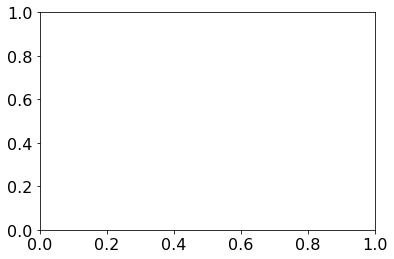

In [10]:
# BUG 2
plt.contourf(alch, acid, cdf["prediction"].values.reshape(alch.shape), alpha=0.1)
ax = plt.gca()
c0 = test[test["class"] == "class_0"]
c1 = test[test["class"] == "class_1"]
c2 = test[test["class"] == "class_2"]
c0.plot.scatter(x='alcohol', y='malic_acid',
                ax=ax, color="purple", label="class_0")
c1.plot.scatter(x='alcohol', y='malic_acid',
                ax=ax, color="green", label="class_1")
c2.plot.scatter(x='alcohol', y='malic_acid',
                ax=ax, color="orange", label="class_2")